<a href="https://colab.research.google.com/github/MhammadRezaValiYari/loan-validation/blob/main/Loan_validation_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import essensional library

In [8]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [9]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/loan_data_set.csv'
data = pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
df = pd.DataFrame(data)
df.head(4)

Mounted at /content/drive
/content/drive/MyDrive/loan_data_set.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


# Data Cleaning

In [10]:
df = df.drop(['Loan_ID'], axis='columns')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])

In [15]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [4]:
def replace(df, col, rep1, rep2):
  df[col] = df[col].replace(rep1, rep2)
  return df

In [16]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
replace(df = df, col = 'Dependents', rep1 = '3+', rep2 = 3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [19]:
df.fillna(method='bfill', inplace=True)

In [20]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Correlation matrix



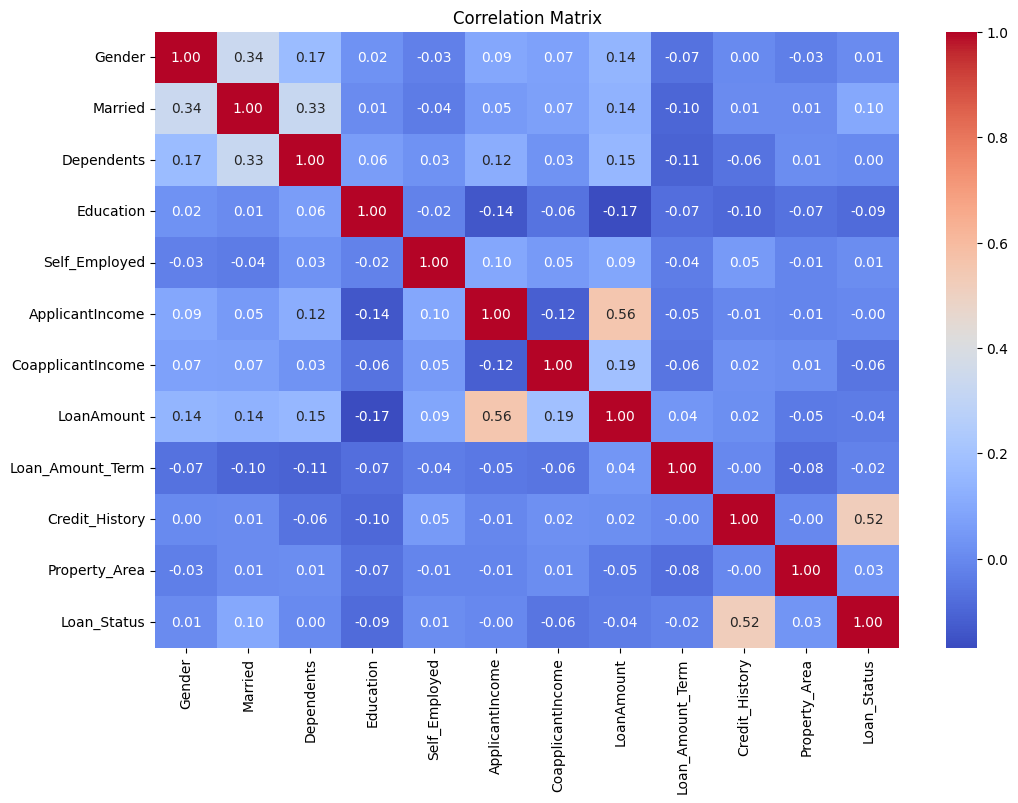

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Mutual information & feature selection


In [35]:
from sklearn.feature_selection import mutual_info_classif

x = df.drop(columns='Loan_Status')
y = df['Loan_Status']

mu_scores = mutual_info_classif(x, y, random_state=42)
mu_df = pd.DataFrame({
    'Feature' : x.columns,
    'mutual_score' : mu_scores
})
mu_df.sort_values(by='mutual_score', ascending=False)

,Feature,mutual_score
9,Credit_History,0.124221
4,Self_Employed,0.018088
0,Gender,0.013043
5,ApplicantIncome,0.011075
3,Education,0.009016
6,CoapplicantIncome,0.001550
1,Married,0.000000
2,Dependents,0.000000
7,LoanAmount,0.000000
8,Loan_Amount_Term,0.000000


In [36]:
mu_df[mu_df['mutual_score'] > 0.01]['Feature']

,Feature
0,Gender
4,Self_Employed
5,ApplicantIncome
9,Credit_History


In [72]:
selected_features = df[['Credit_History', 'ApplicantIncome', 'Self_Employed']]

In [73]:
selected_features

,Credit_History,ApplicantIncome,Self_Employed
0,1.0,5849,0
1,1.0,4583,0
2,1.0,3000,1
3,1.0,2583,0
4,1.0,6000,0
...,...,...,...
609,1.0,2900,0
610,1.0,4106,0
611,1.0,8072,0
612,1.0,7583,0


# feature selection & feature scaling

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(selected_features, y, random_state=42, test_size=0.15, stratify=y)

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc_train = sc.fit_transform(x_train)
x_sc_test = sc.transform(x_test)

# Decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Dcmodel = DecisionTreeClassifier(random_state=42, max_depth=5, ccp_alpha = 0.001 ,criterion = 'gini', max_features = 'sqrt', max_leaf_nodes = None, min_samples_leaf = 1, min_samples_split = 2, splitter= 'random')

In [84]:
Dcmodel.fit(x_sc_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='sqrt',
                       random_state=42, splitter='random')

In [85]:
y_pred = Dcmodel.predict(x_sc_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8387096774193549

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68        29
           1       0.83      0.97      0.89        64

    accuracy                           0.84        93
   macro avg       0.86      0.76      0.79        93
weighted avg       0.85      0.84      0.83        93



## Checking Overfitting

In [87]:
train_pred = Dcmodel.predict(x_sc_train)
test_pred = Dcmodel.predict(x_sc_test)
print(f'train_accuracy_score: {accuracy_score(y_train, train_pred)}')
print(f'test_accuracy_score: {accuracy_score(y_test, test_pred)}')

train_accuracy_score: 0.7984644913627639
test_accuracy_score: 0.8387096774193549


# Grid Search CV

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [2, 5, 10, None],
    'ccp_alpha': [0.0, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

In [58]:
grid_search.fit(x_sc_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
print(f"Best Paramters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Paramters: {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Score: 0.7922902494331066


# Randomized Search CV


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


In [55]:
random_search.fit(x_sc_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c95b498fe50>,
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c95b68e4f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c95b68e4790>},
                   scoring='accuracy', verbose=1)

In [56]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 12}
Best Score: 0.7841063698206555


# Over Sampling

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_sc_train, y_train)
x_resampeld = sc.fit_transform(X_resampled)

In [45]:
Dcmodel.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [46]:
Dcmodel.score(x_sc_test, y_test)

0.8373983739837398

In [47]:
train_dist = pd.DataFrame(X_resampled).describe()
test_dist = pd.DataFrame(x_test).describe()
print(f'train_dist: {train_dist}')
print(f'test_dist: {test_dist}')

train_dist:                 0           1           2           3           4
count  674.000000  674.000000  674.000000  674.000000  674.000000
mean    -0.221533   -0.023013    0.024755   -0.012493    0.002894
std      1.177090    0.883529    0.966139    0.989562    0.957663
min     -2.373844   -0.824652   -5.069730   -0.450244   -1.605276
25%      0.421258   -0.392174    0.280691   -0.450244   -0.512226
50%      0.421258   -0.236700    0.280691   -0.450244   -0.209256
75%      0.421258    0.043948    0.280691   -0.450244    0.285092
max      0.421258   11.698590    2.125664    3.234254    6.408491
test_dist:                 0           1           2           3           4
count  123.000000  123.000000  123.000000  123.000000  123.000000
mean     0.131133   -0.099078    0.024050    0.028775   -0.062741
std      0.983230    0.766482    0.996774    1.023874    0.961084
min     -1.910693   -0.919021   -4.184897   -0.404054   -1.485791
25%      0.600753   -0.487493    0.264697   -0.404054